<a href="https://colab.research.google.com/github/anujdutt9/Tensorflow-DeepLearning/blob/master/Fashion_MNIST_DNN_TF2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Installing latest version of TensorFlow and TensorFlow Datasets
# !pip install tensorflow==2.0.0-alpha0
# !pip install tensorflow-datasets

In [0]:
# Import Dependencies
import math
import tqdm
import tqdm.auto
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
tqdm.tqdm = tqdm.auto.tqdm
%matplotlib inline

In [0]:
# Check TF Version
tf.__version__

'2.0.0-alpha0'

In [0]:
# Load Fashion MNIST Dataset using TensorFlow Dataset API as a Supervised learning Task Dataset and with additional Info
dataset, info = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_data, test_data = dataset["train"], dataset["test"]

In [0]:
# Define Outpu Class Labels
class_labels = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
# Explore the dataset
print("Number of Training Examples: ", info.splits['train'].num_examples)
print("Number of Test Examples: ", info.splits['test'].num_examples)

Number of Training Examples:  60000
Number of Test Examples:  10000


In [0]:
# Data Preprocessing
def dataNormalization(images, labels):
  # Change image values data type to float32
  images = tf.cast(images, tf.float32)
  # Normalize image values to range between 0 and 1
  images /= 255
  # Return normalized images with labels
  return images, labels

# Apply Normalization to all images in training and test dataset
# map: Function to apply the "dataNormalization" function to each element in the training and test datasets
train_data = train_data.map(dataNormalization)
test_data = test_data.map(dataNormalization)

In [0]:
# Data Exploration
# Take a single image from the test dataset and plot the image
for image, label in test_data.take(1):
  break

# Get type of the image
type(image)

tensorflow.python.framework.ops.EagerTensor

In [0]:
# Convert Image Tensor to Numpy Array
image = image.numpy()
type(image)

numpy.ndarray

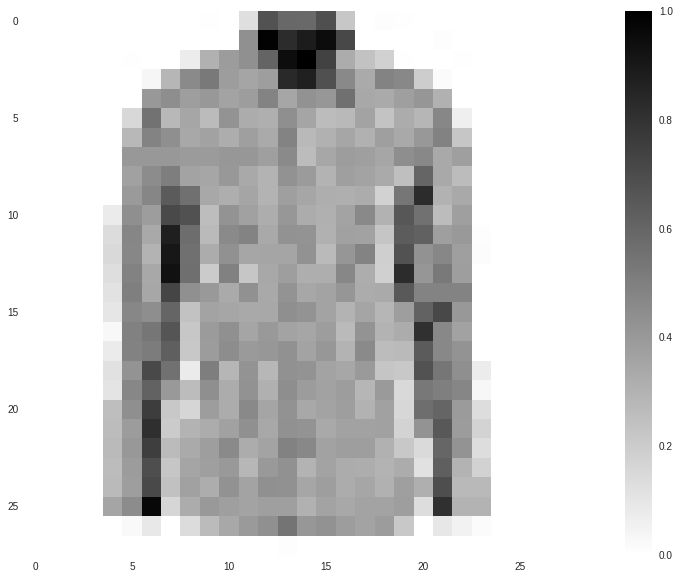

In [0]:
# Reshape the image and plot
image = image.reshape((28,28))

# Plot the Image
plt.figure(figsize=(20,10))
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

In [0]:
# Labels
label = label.numpy()
label

6

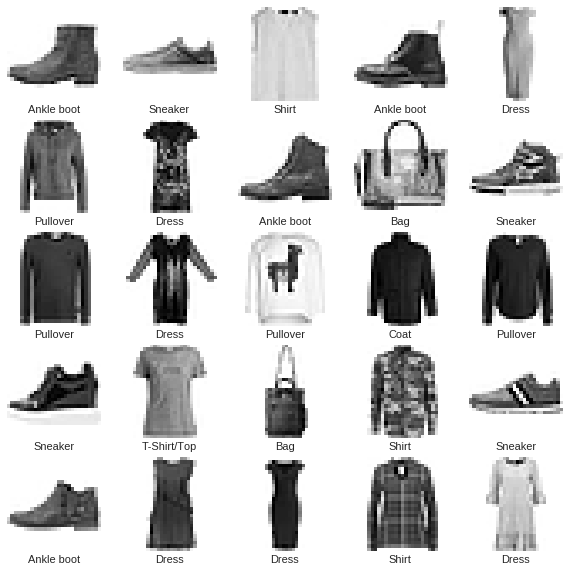

In [0]:
# Plot first 25 images
plt.figure(figsize=(10,10))
i = 0

# Access first "n" number of images
for (image, label) in train_data.take(25):
  # Convert image tensor to numy and reshape
  image = image.numpy().reshape((28,28))
  # Plot images in Grids
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_labels[label])
  i += 1

In [0]:
# Build the Model

# Layer-0: Flatten Layer => Take the "input" image as 28x28 and "flatten" to 784 values for input
l_0 = tf.keras.layers.Flatten(input_shape=(28,28,1))

# Layer-1: Dense Layer => Take the 784 values as "input" and pass on to 128 neurons in Dense Layer
l_1 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)

# Layer-2: Output Dense Layer => Take 128 outputs from previous layer and input that to 10 neurons.
l_2 = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)

# Define the Model with all Layers
model = tf.keras.Sequential([l_0, l_1, l_2])

In [0]:
# Compile the Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [0]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Train the Model

1. dataset.repeat():    Repeat forever by specifying this.
2. dataset.shuffle():   Shuffle the order of the training dataset 
3. dataset.batch(N):  Train model using "N" number of images and labels per batch

In [0]:
# Train the Model

# Number of images and labels per batch
batch_size = 32

# Number of images,labels in training dataset
n_train_data = info.splits['train'].num_examples

# Defining training data loading parameters like repeat, shuffle and batch
train_data = train_data.repeat().shuffle(n_train_data).batch(batch_size)

# Define test data loading parameters
test_data = test_data.batch(batch_size)

In [0]:
train_data

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [0]:
test_data

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [0]:
# Train the Model
# epochs: how many times to go through the whole dataset. Here, it passes over 5 * 60,000 = 300,000 samples of data in training set
model.fit(train_data, epochs=10, steps_per_epoch=math.ceil(n_train_data/batch_size))

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4897 - accuracy: 0.8277
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3806 - accuracy: 0.8616
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3378 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3082 - accuracy: 0.8878
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2949 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2723 - accuracy: 0.8985
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2699 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2560 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2479 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 22s 12m

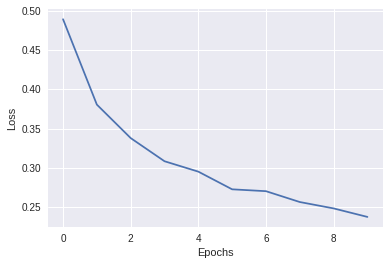

In [0]:
# Display Model History
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(model.history.history['loss'])

In [0]:
# Evaluate Model Accuracy on Test Dataset
n_test_data = info.splits['test'].num_examples

test_loss, test_accuracy = model.evaluate(test_data, steps=math.ceil(n_test_data/batch_size))
print("Accuracy on Test Dataset: ",test_accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.3400 - accuracy: 0.8838
Accuracy on Test Dataset:  0.8838


In [0]:
# Make Predictions on 32 images i.e. one batch of images from test dataset
for test_image, test_label in test_data.take(1):
  # Convert Tensor to Numpy
  test_image, test_label = test_image.numpy(), test_label.numpy()
  predictions = model.predict(test_image)

In [0]:
# For 32 images, 10 probabilities per image per class label
predictions.shape

(32, 10)

In [0]:
predictions[0]

array([1.0638215e-06, 2.4810093e-10, 6.3082203e-04, 4.9742976e-06,
       1.5866904e-02, 4.8190219e-11, 9.8349619e-01, 8.5347379e-14,
       1.9257952e-10, 5.5742112e-12], dtype=float32)

In [0]:
# Get the Class Labels
print("Predicted Class Labels")
for i in range(len(predictions)):
  pred = str(np.argmax(predictions[i])) + "  =>  " + str(class_labels[np.argmax(predictions[i])])
  print(pred)

Predicted Class Labels
6  =>  Shirt
3  =>  Dress
6  =>  Shirt
9  =>  Ankle boot
2  =>  Pullover
5  =>  Sandal
9  =>  Ankle boot
5  =>  Sandal
6  =>  Shirt
3  =>  Dress
8  =>  Bag
1  =>  Trouser
0  =>  T-Shirt/Top
3  =>  Dress
9  =>  Ankle boot
6  =>  Shirt
7  =>  Sneaker
2  =>  Pullover
9  =>  Ankle boot
8  =>  Bag
4  =>  Coat
0  =>  T-Shirt/Top
8  =>  Bag
6  =>  Shirt
8  =>  Bag
8  =>  Bag
1  =>  Trouser
5  =>  Sandal
7  =>  Sneaker
4  =>  Coat
2  =>  Pullover
4  =>  Coat


In [0]:
# Helper Plotting Functions

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_labels[predicted_label],
                                100*np.max(predictions_array),
                                class_labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

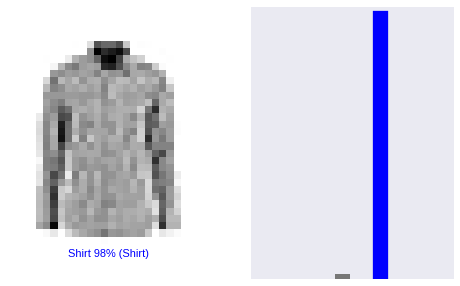

In [0]:
i = 0
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plot_image(i, predictions, test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_label)

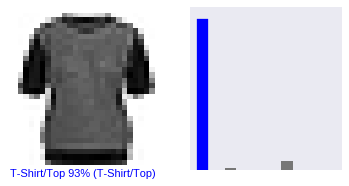

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_label)

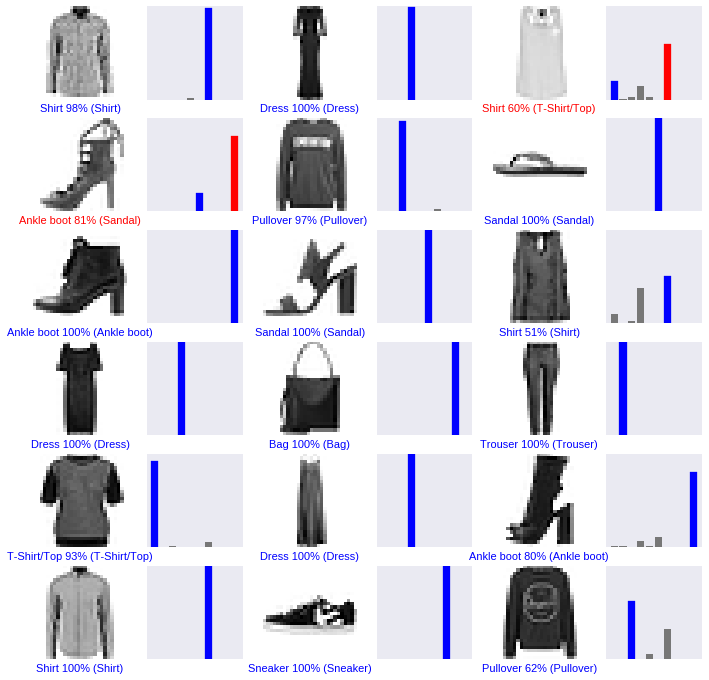

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 6
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_label)

In [0]:
# Save the Model
tf.keras.models.save_model(
    model,
    "fashion_mnist.h5",
    overwrite=True,
    include_optimizer=True
)